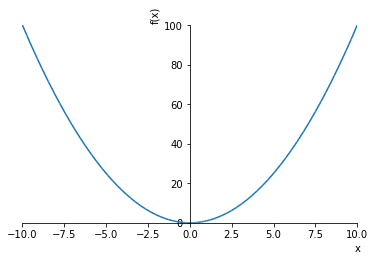

In [1]:
from sympy import *

x = symbols('x')
plotting.plot(x**2)

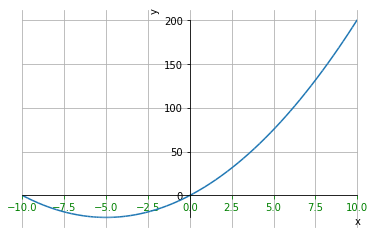

In [23]:
import matplotlib.pyplot as plt
plt.rcParams['axes.grid']= True 

from sympy import *
x = symbols('x')
plotting.plot(x**2 + 10*x, ylabel='y')

In [24]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.mencoder_args': [],
          'animation.mencoder_path': 'mencoder',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'k',
          'axes.facecolor': 'w',
          'axes.formatter.limits': [-7, 7],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.form

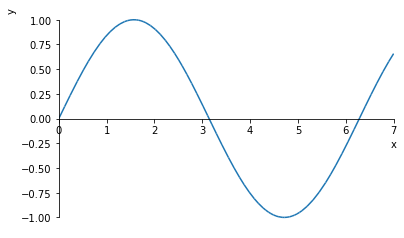

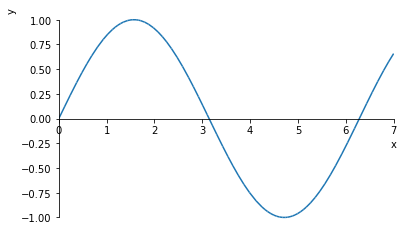

In [16]:
from sympy import sin
from sympy import symbols
from sympy.plotting import plot

x = symbols('x')
y = sin(x)

p1=plot(y,(x,0,7),ylabel="y")
fig = p1._backend.fig
ax = p1._backend.ax

ax.axis('equal')
p1.show()

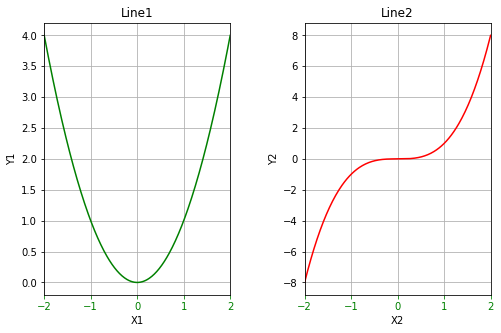

In [44]:
import matplotlib.pyplot as plt
from sympy import symbols
import numpy as np

from sympy import symbols
from sympy.plotting import plot

# part 1
# uses symbolic plot of functions
x = symbols('x')

#p1, p2 = plot(x**2, x**3, (x, -2, 2))

# this plot will not show ...
# only produce 2 curves
p1, p2 = plot((x**2, (x, -2, 2)), \
                (x**3, (x, -2, 2)), \
                show=False)
# collect (x,y)'s of the unseen curves 
x1y1 = p1.get_points()  # array of 2D
x2y2 = p2.get_points() 

# part 2
# uses regular matplotlib to plot the data

fig = plt.figure(figsize=(8, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# do subplot 1 
ax1.plot(x1y1[0], x1y1[1], 'g')  # plot x**2 in green
ax1.set_xlim([-2, 2])
ax1.set_xlabel('X1')
ax1.set_ylabel('Y1')
ax1.set_title('Line1')  # destroyed by another .title(); axis metho1

# do subplot 2
ax2.plot(x2y2[0], x2y2[1], 'r')  # plot x**3 in red
ax2.set_xlim([-2, 2])
ax2.set_xlabel('X2')
ax2.set_ylabel('Y2')
ax2.set_title('Line2')

fig.subplots_adjust(wspace=0.4) # set space between subplots

plt.show()

<IPython.core.display.Javascript object>


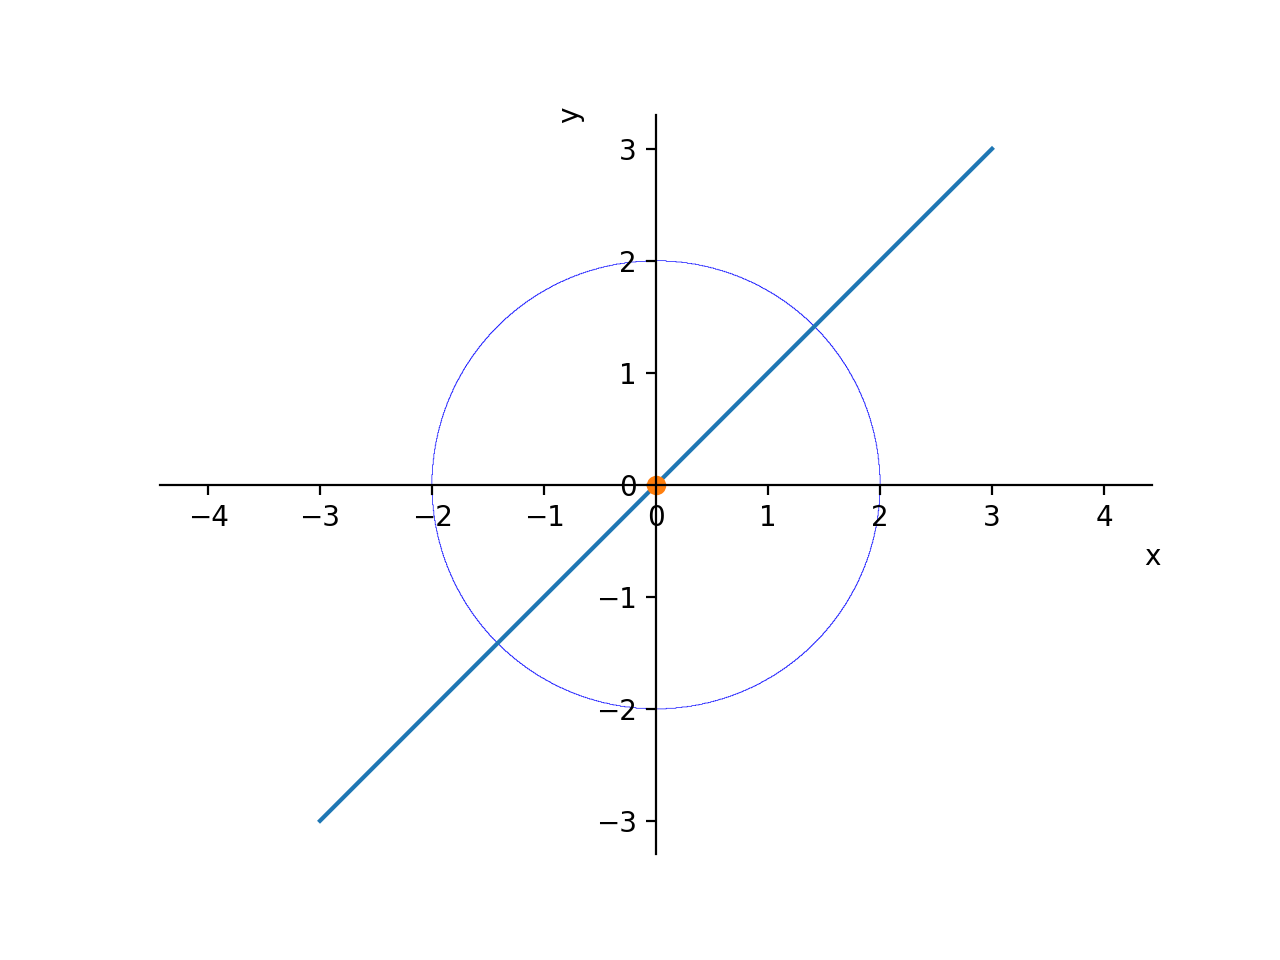

In [23]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook
from sympy import *

x, y = symbols("x y")
hp = plot_implicit(Eq(x**2 + y**2, 4), (x, -3, 3), (y, -3, 3))
fig = hp._backend.fig
ax = hp._backend.ax
xx = yy = np.linspace(-3,3)
ax.plot(xx,yy) # y = x
ax.plot([0],[0],'o') # Point (0,0)
ax.set_aspect('equal','datalim')
fig.canvas.draw()

<IPython.core.display.Javascript object>


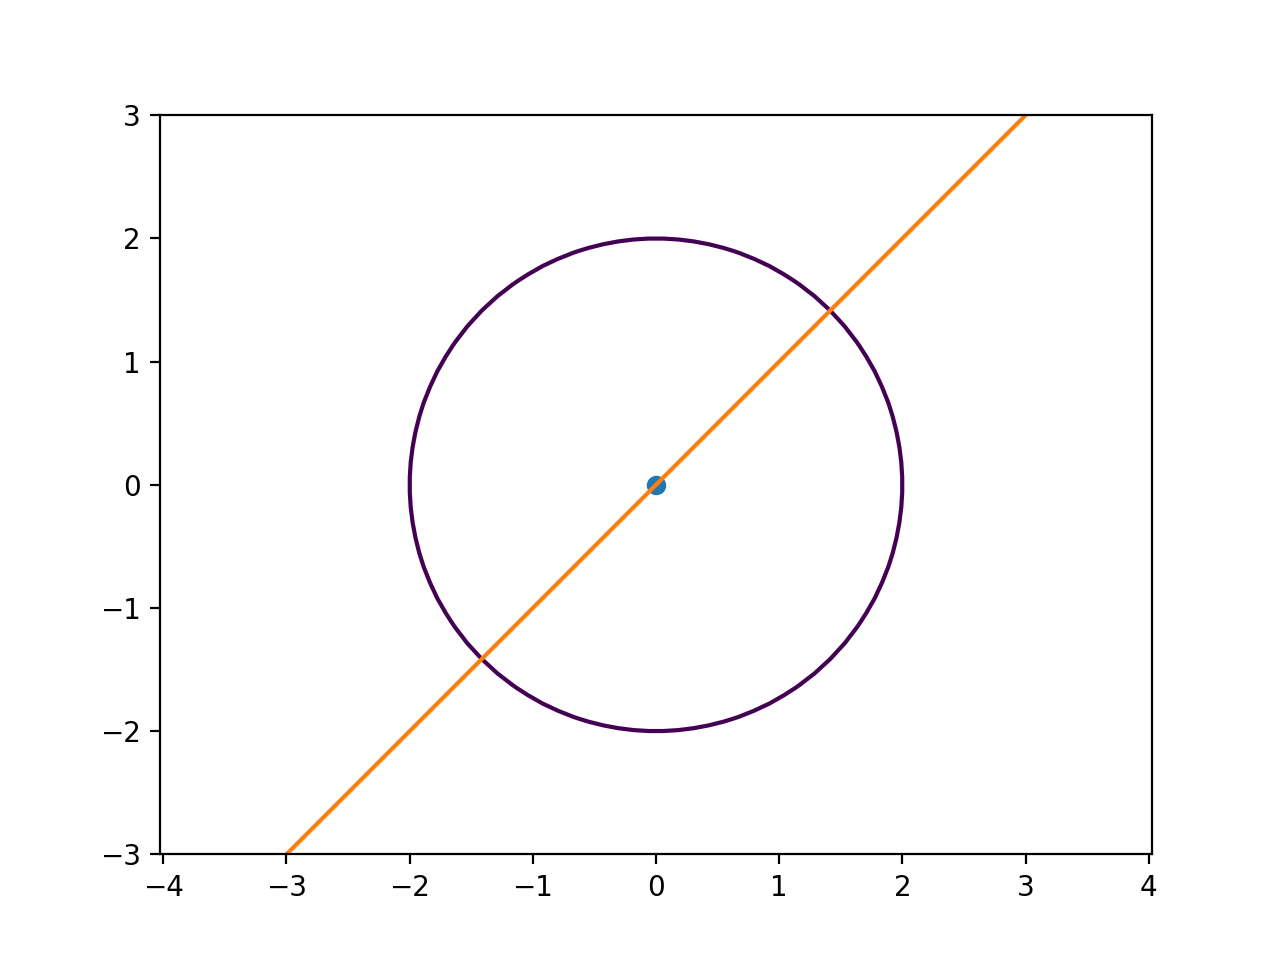

In [21]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1,1)
xx,yy = np.linspace(-3,3), np.linspace(-3,3)
x,y = np.meshgrid(xx,yy)
ax.contour(x, y, (x**2+y**2-4), [0]);
ax.plot([0],[0],"o")
ax.plot(xx,yy)
ax.set_aspect('equal','datalim')